In [2]:
import numpy
import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython.display import Image
from scipy import signal
from scipy.fft import fftshift
from scipy.io import wavfile
plt.rcParams['figure.figsize'] = [12, 4]
# from IPython.core.display import HTML
# HTML("""
# <style>
# .output_png {
#     display: table-cell;
#     text-align: center;
#     vertical-align: middle;
# }
# </style>
# """)

In [163]:
def calc(degree, radius, speed_sound, frequency):
    intensity = numpy.cos(numpy.deg2rad(degree))
    delay = radius/speed_sound*(numpy.deg2rad(degree)+numpy.sin(numpy.deg2rad(degree)))
    data_points = delay/(1/frequency)
    return delay, intensity, data_points

In [164]:
calc(45, 9, 30000, 44000)

(0.0004477514833751987, 0.7071067811865476, 19.701065268508742)

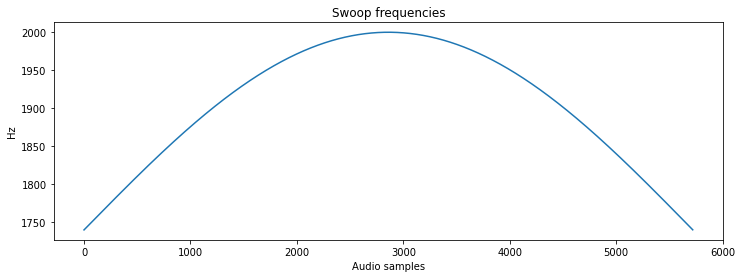

In [3]:
plt.plot(-260*numpy.sin(-numpy.pi/5720*numpy.arange(5720)) + 1740)
plt.xlabel('Audio samples'); plt.ylabel('Hz'); plt.title('Swoop frequencies')
plt.show()

In [4]:
# https://www.analog.com/en/analog-dialogue/articles/all-about-direct-digital-synthesis.html
# DDS: direct digital synthesis -- phase accumulator, phase-to-amplitude conversion (often a sin lookup table), and a DAC

In [178]:
Fs = 44000 #audio sample rate
length = 5720
attack_time = 1000
decay_time = 1000
sustain_time = length-attack_time-decay_time

In [179]:
sintable = numpy.sin(numpy.linspace(0, 2*numpy.pi, 256))# sine table for DDS
two32 = 2**32 #2^32
swoop = list(numpy.zeros(length)) # a 5720-length array (130ms @ 44kHz) that will hold swoop audio samples
DDS_phase = 0 # current phase
for i in range(len(swoop)):
    frequency = 300#-260.*numpy.sin((-numpy.pi/length)*i) + 1740 # calculate frequency
    DDS_increment = frequency*two32/Fs # update DDS increment
    DDS_phase += DDS_increment # update DDS phase by increment
    DDS_phase = DDS_phase % (two32 - 1) # need to simulate overflow in python, not necessary in C
    swoop[i] = sintable[int(DDS_phase/(2**24))] # can just shift in C

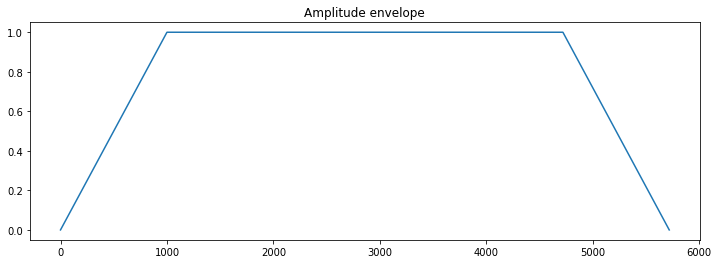

In [180]:
# Amplitude modulate with a linear envelope to avoid clicks
amplitudes = list(numpy.ones(len(swoop)))
amplitudes[0:attack_time] = list(numpy.linspace(0,1,len(amplitudes[0:attack_time])))
amplitudes[-decay_time:] = list(numpy.linspace(0,1,len(amplitudes[-decay_time:]))[::-1])
amplitudes = numpy.array(amplitudes)
plt.plot(amplitudes);plt.title('Amplitude envelope');plt.show()
# Finish with the swoop
swoop_data = swoop*amplitudes

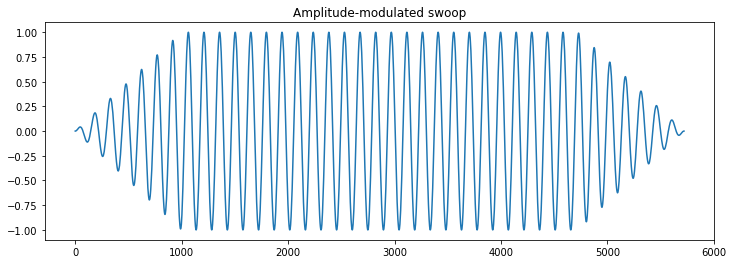

In [181]:
plt.plot(swoop_data);plt.title('Amplitude-modulated swoop');plt.show()

In [182]:
Audio(swoop_data, rate=44000)

In [184]:
attack_time_left = 5000;
decay_time_left = 720;
attack_time_right = 720;
decay_time_right = 5000;

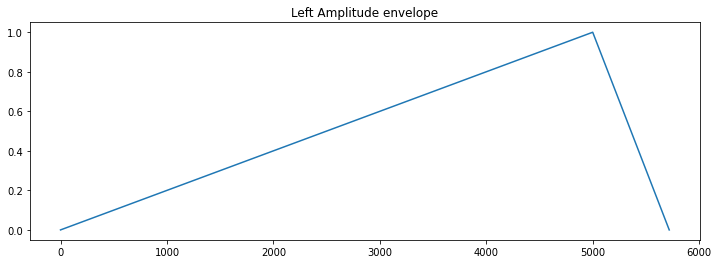

In [185]:
# Amplitude modulate with a linear envelope to avoid clicks
amplitudes_left = list(numpy.ones(length))
amplitudes_left[0:attack_time_left] = list(numpy.linspace(0,1,len(amplitudes_left[0:attack_time_left])))
amplitudes_left[-decay_time_left:] = list(numpy.linspace(0,1,len(amplitudes_left[-decay_time_left:]))[::-1])
amplitudes_left = numpy.array(amplitudes_left)
plt.plot(amplitudes_left);plt.title('Left Amplitude envelope');plt.show()

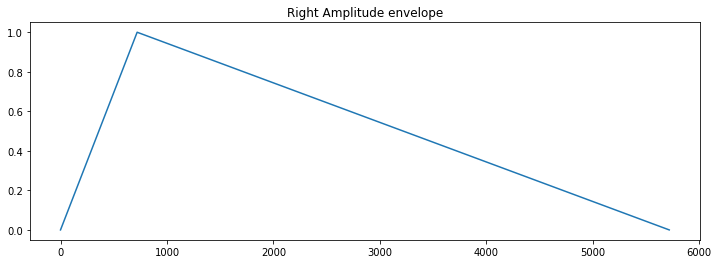

In [186]:
# Amplitude modulate with a linear envelope to avoid clicks
amplitudes_right = list(numpy.ones(length))
amplitudes_right[0:attack_time_right] = list(numpy.linspace(0,1,len(amplitudes_right[0:attack_time_right])))
amplitudes_right[-decay_time_right:] = list(numpy.linspace(0,1,len(amplitudes_right[-decay_time_right:]))[::-1])
amplitudes_right = numpy.array(amplitudes_right)
plt.plot(amplitudes_right);plt.title('Right Amplitude envelope');plt.show()

In [187]:
# sweeping sound
dataleft = swoop*amplitudes_left
dataright = swoop*amplitudes_right
Audio([dataleft, dataright],rate=44000)

In [202]:
sound_speed = 34000
sampling_frequency = 44000
head_size = 8

In [203]:
# stationary sound
Audio(swoop_data, rate=44000)

In [204]:
delay, intensity, datapoints = calc(75, head_size, sound_speed, sampling_frequency)
dataleft_1 = swoop_data * intensity
dataright_1 = swoop_data
empty = numpy.zeros(int(datapoints))
dataleft_1 = numpy.array(numpy.append(empty, dataleft_1)[:-int(datapoints)])
# 45 degree to right
Audio([dataleft_1, dataright_1],rate=44000)

In [205]:
delay, intensity, datapoints = calc(45, head_size, sound_speed, sampling_frequency)
dataleft_2 = swoop_data
dataright_2 = swoop_data * intensity
empty = numpy.zeros(int(datapoints))
dataright_2 = numpy.array(numpy.append(empty, dataright_2)[:-int(datapoints)])
# 45 degree to left
Audio([dataleft_2, dataright_2],rate=44000)

In [206]:
delay, intensity, datapoints = calc(75, head_size, sound_speed, sampling_frequency)
dataleft_3 = swoop_data
dataright_3 = swoop_data * intensity
empty = numpy.zeros(int(datapoints))
dataright_3 = numpy.array(numpy.append(empty, dataright_3)[:-int(datapoints)])
# 75 degree to left
Audio([dataleft_3, dataright_3],rate=44000)

In [207]:
delay, intensity, datapoints = calc(75, head_size, sound_speed, sampling_frequency)
dataleft_4 = swoop_data * intensity
dataright_4 = swoop_data
empty = numpy.zeros(int(datapoints))
dataleft_4 = numpy.array(numpy.append(empty, dataleft_4)[:-int(datapoints)])
# 75 degree to right
Audio([dataleft_4, dataright_4],rate=44000)

In [208]:
delay, intensity, datapoints = calc(40, head_size, sound_speed, sampling_frequency)
dataleft_5 = swoop_data
dataright_5 = swoop_data * intensity
empty = numpy.zeros(int(datapoints))
dataright_5 = numpy.array(numpy.append(empty, dataright_5)[:-int(datapoints)])
# 30 degree to left
Audio([dataleft_5, dataright_5],rate=44000)

In [209]:
delay, intensity, datapoints = calc(30, head_size, sound_speed, sampling_frequency)
dataleft_6 = swoop_data * intensity
dataright_6 = swoop_data
empty = numpy.zeros(int(datapoints))
dataleft_6 = numpy.array(numpy.append(empty, dataleft_6)[:-int(datapoints)])
# 30 degree to right
Audio([dataleft_6, dataright_6],rate=44000)

In [195]:
calc(120, 9, 30000, 66000)

(0.0008881261518532902, -0.4999999999999998, 58.61632602231715)

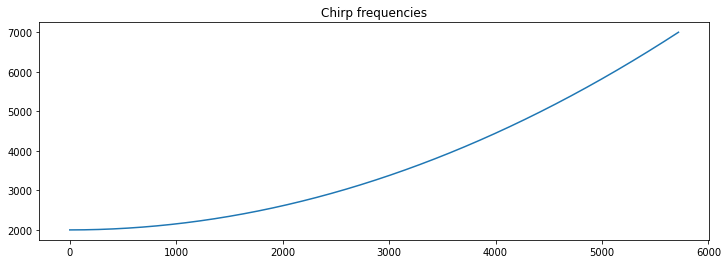

In [9]:
plt.plot(1.53e-4 * numpy.arange(5720)**2. + 2000);plt.title('Chirp frequencies');plt.show()

In [10]:
chirp = list(numpy.zeros(5720)) # a 5720-length array (130ms @ 44kHz) that will hold chirp audio samples
DDS_phase = 0 # current phase
for i in range(len(chirp)):
    frequency = (1.53e-4)*(i**2.) + 2000 # update DDS frequency
    DDS_increment = frequency*two32/Fs # update DDS increment
    DDS_phase += DDS_increment # update DDS phase
    DDS_phase = DDS_phase % (two32 - 1) # need to simulate overflow in python, not necessary in C
    chirp[i] = sintable[int(DDS_phase/(2**24))] # can just shift in C

In [11]:
# Amplitude modulate with a linear envelope to avoid clicks
amplitudes = list(numpy.ones(len(chirp)))
amplitudes[0:1000] = list(numpy.linspace(0,1,len(amplitudes[0:1000])))
amplitudes[-1000:] = list(numpy.linspace(0,1,len(amplitudes[-1000:]))[::-1])
amplitudes = numpy.array(amplitudes)

# Finish with the chirp
chirp = chirp*amplitudes

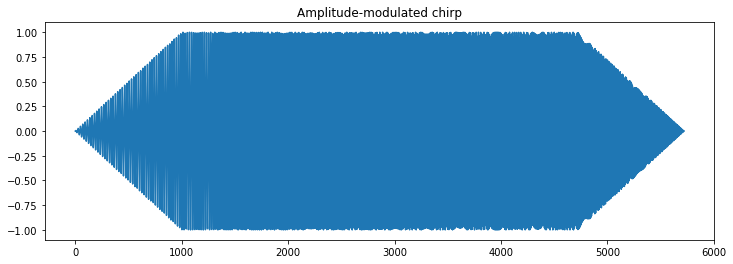

In [12]:
plt.plot(chirp);plt.title('Amplitude-modulated chirp');plt.show()

In [13]:
Audio(chirp, rate=44000)

In [26]:
silence = numpy.zeros(5720)

In [27]:
song = []
for i in range(5):
    song.extend(list(swoop))
    song.extend(list(chirp))
    song.extend(list(silence))
song.extend(list(swoop))
song.extend(list(chirp))
song.extend(list(silence))
song = numpy.array(song)

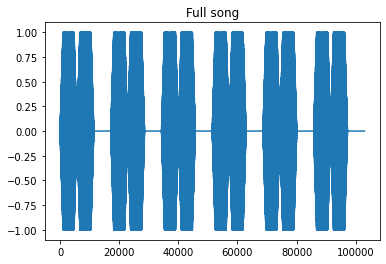

In [28]:
plt.plot(song);plt.title('Full song');plt.show()

In [36]:
Audio(song, rate=44000)

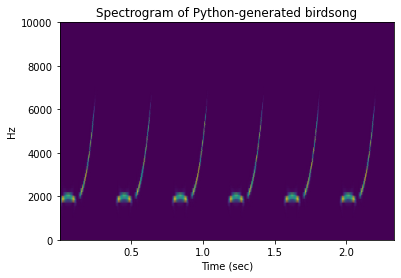

In [31]:
f, t, Sxx = signal.spectrogram(song, Fs)
plt.pcolormesh(t, f, Sxx,  shading='gouraud')
plt.ylabel('Hz'); plt.xlabel('Time (sec)')
plt.title('Spectrogram of Python-generated birdsong')
plt.ylim([0,10000])
plt.show()